In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
path = '../data/aftershock-region.csv'
data = pd.read_csv(path)
data = data.dropna()
print(data.head)
print(data.columns)

<bound method NDFrame.head of      magnitude  region  region_log
0          7.9   13000    4.113943
1          7.9   12700    4.103804
2          7.9   12600    4.100371
3          7.9   12600    4.100371
4          7.9   12900    4.110590
..         ...     ...         ...
184        5.1      16    1.204120
185        5.1      15    1.176091
186        5.1      15    1.176091
187        5.1      14    1.146128
188        5.1      14    1.146128

[189 rows x 3 columns]>
Index(['magnitude', 'region', 'region_log'], dtype='object')


In [5]:
x = data[['magnitude']]
y = data[['region']]
y_log = data[['region_log']]
print(x.shape, y.shape,y_log.shape)

(189, 1) (189, 1) (189, 1)


No handles with labels found to put in legend.


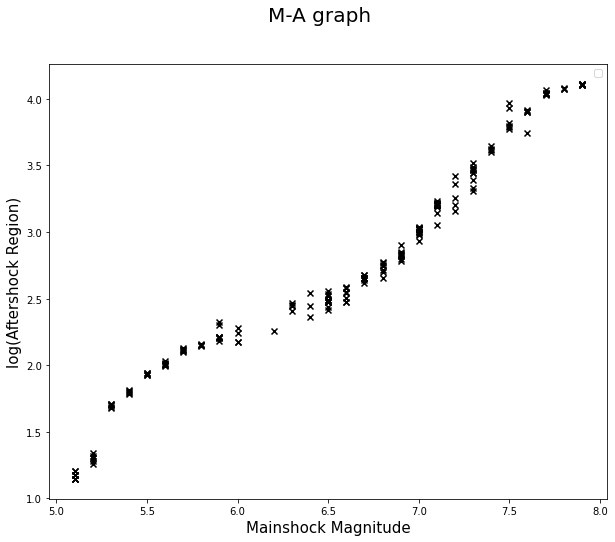

In [6]:
#graph
plt.figure(figsize=(10, 8))
plt.scatter(x,y_log,c='black',marker='x')
plt.xlabel('Mainshock Magnitude', fontsize='15')
plt.ylabel('log(Aftershock Region)', fontsize='15')
plt.suptitle('M-A graph',fontsize='20')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8]:
x_train,x_test, y_train,y_test = train_test_split(x,y_log,test_size=0.2,shuffle=True)

model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_,model.intercept_)

[[0.94862811]] [-3.51547513]


In [9]:
y_predict = model.predict(x_test)
pow_10 = np.vectorize(lambda x: 10**x)
print(r2_score(y_train,model.predict(x_train)))
print(r2_score(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(r2_score(pow_10(y_test),pow_10(y_predict)))
print(mean_squared_error(pow_10(y_test),pow_10(y_predict)))

0.9560056652705013
0.955455731189641
0.026251676070731037
0.8004691481583697
2189897.0475702495


c:\Users\didhw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
No handles with labels found to put in legend.


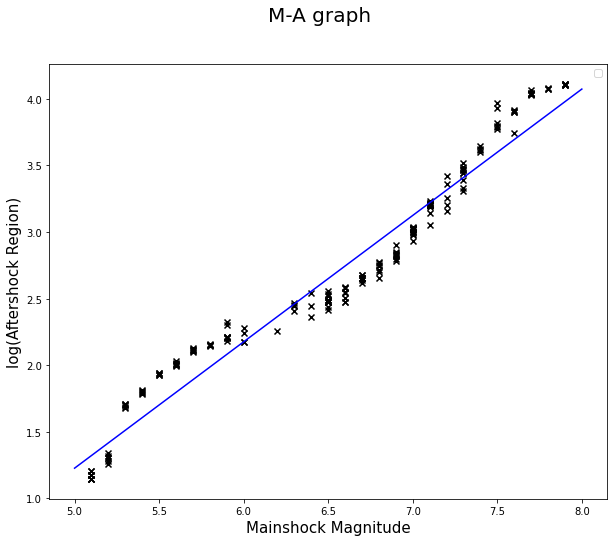

In [10]:
X_new = np.linspace(5,8,100).reshape(100,1)
y_new = model.predict(X_new)

#graph
plt.figure(figsize=(10, 8))
plt.scatter(x,y_log,c='black',marker='x')
plt.plot(X_new,y_new,c='blue')
plt.xlabel('Mainshock Magnitude', fontsize='15')
plt.ylabel('log(Aftershock Region)', fontsize='15')
plt.suptitle('M-A graph',fontsize='20')
plt.legend()
plt.show()

No handles with labels found to put in legend.


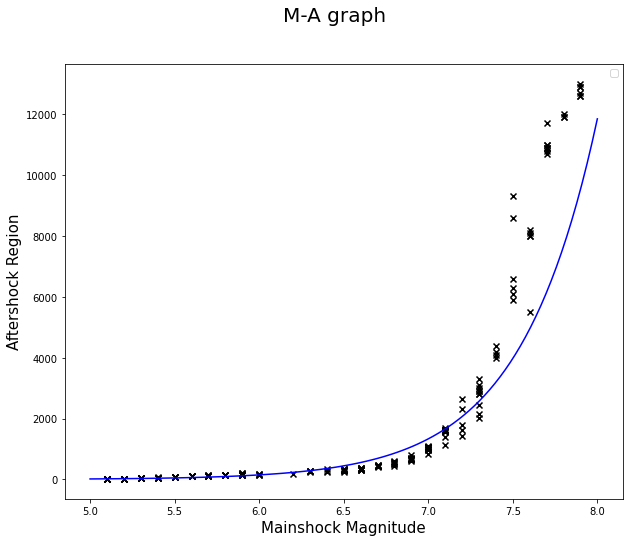

In [11]:
#graph
plt.figure(figsize=(10, 8))
plt.scatter(x,y,c='black',marker='x')
plt.plot(X_new,pow_10(y_new),c='blue')
plt.xlabel('Mainshock Magnitude', fontsize='15')
plt.ylabel('Aftershock Region', fontsize='15')
plt.suptitle('M-A graph',fontsize='20')
plt.legend()
plt.show()